4.2

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

(224, 224, 3)


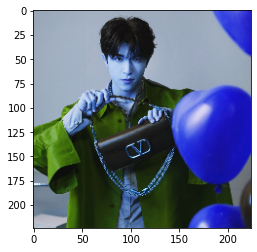

In [ ]:
img = cv2.imread("image6.jpg")
# img.reshape()
center = (img.shape[1]/2,img.shape[0]/2)
h = img.shape[0]
w = img.shape[1]
if(h > w):
    h = w
else:
    w = h
img = cv2.getRectSubPix(img, (w,h),center)
img = cv2.resize(img,(224,224))
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
#3D --> 4D
img = expand_dims(img, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


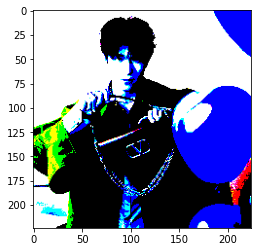

In [ ]:

img_mean = [103.939, 116.779, 123.68]
img = img.astype("float64")
print(img.shape)
img[0,:,:,0] -= img_mean[0]
img[0,:,:,1] -= img_mean[1]
img[0,:,:,2] -= img_mean[2]
plt.imshow(img[0,:,:,:])
plt.show()

4.3

In [ ]:
model = VGG16()
kernels, biases = model.layers[1].get_weights()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def relu(img):
    height,weigth = img.shape
    for i in range(height):
        for j in range(weigth):
            if img[i][j] < 0:
                img[i][j] = 0
    return img

(224, 224, 3)


NameError: name 'Image_sum' is not defined

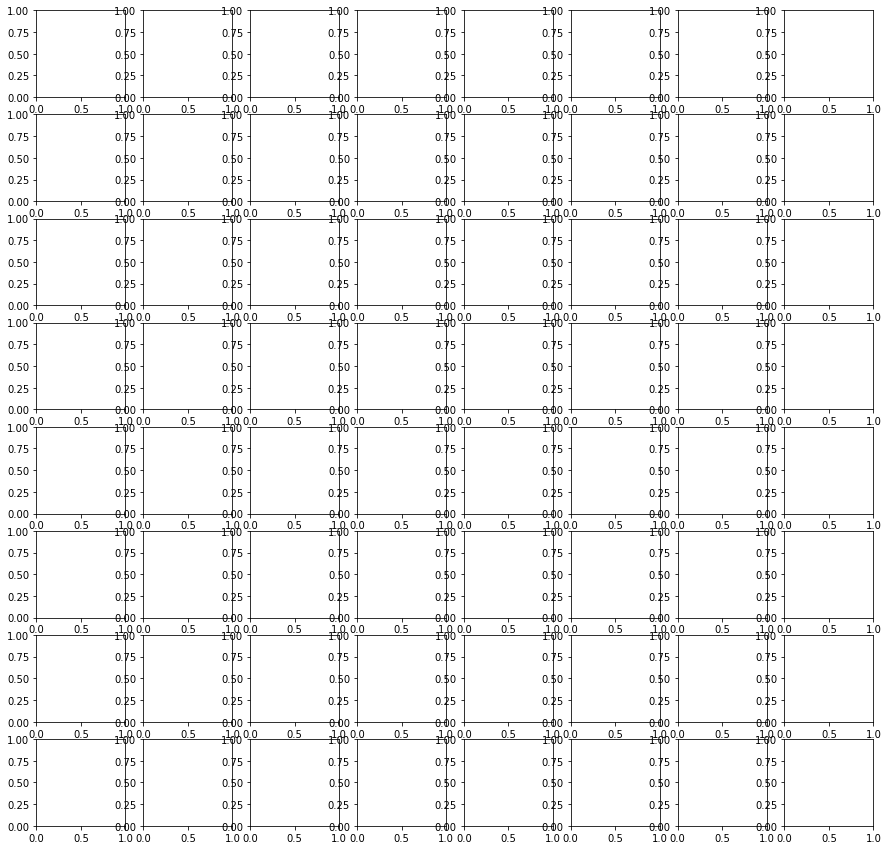

In [ ]:
Img_result = np.copy(img[0,:,:,:])
fig, ax = plt.subplots(8, 8, figsize=(15,15))
fig.patch.set_facecolor('white')
col = 0
row = 0
for j in range(64):
    for i in range(3):
        Img_result[: , :, i] = signal.convolve2d( img[ 0,: , : , i], kernels[: , : , i, j] , mode='same',boundary='fill', fillvalue=0)
    Image_sum = Img_result[ : , : , 0] + Img_result[ : , : , 1] + Img_result[ : , : , 2]
    Image_sum = relu(Image_sum)
    if(col==8):
        row += 1
        col = 0
    ax[row,col].imshow(Image_sum,cmap="jet")
    col +=1
    
print(Img_result.shape)